<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/data_analysis_for_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data_Cleanup**

In [21]:
import numpy as np # 수치 연산
import pandas as pd # 데이터생성을 위한 라이브러리

# 데이터 시각화에 필요한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

#
import missingno as msno

#warning 무시
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline #노트북상에 기능을 띄어주는 것을 의미함

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df_heart=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [4]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df_heart.shape

(303, 14)

In [7]:
#null값 확인 null값 없음
for col in df_heart.columns:
  msg='column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col,100 * (df_heart[col].isnull().sum()/ df_heart[col].shape[0]))
  print(msg)

column:        age	 Percent of Nan value: 0.00%
column:        sex	 Percent of Nan value: 0.00%
column:         cp	 Percent of Nan value: 0.00%
column:   trestbps	 Percent of Nan value: 0.00%
column:       chol	 Percent of Nan value: 0.00%
column:        fbs	 Percent of Nan value: 0.00%
column:    restecg	 Percent of Nan value: 0.00%
column:    thalach	 Percent of Nan value: 0.00%
column:      exang	 Percent of Nan value: 0.00%
column:    oldpeak	 Percent of Nan value: 0.00%
column:      slope	 Percent of Nan value: 0.00%
column:         ca	 Percent of Nan value: 0.00%
column:       thal	 Percent of Nan value: 0.00%
column:     target	 Percent of Nan value: 0.00%


<function matplotlib.pyplot.show>

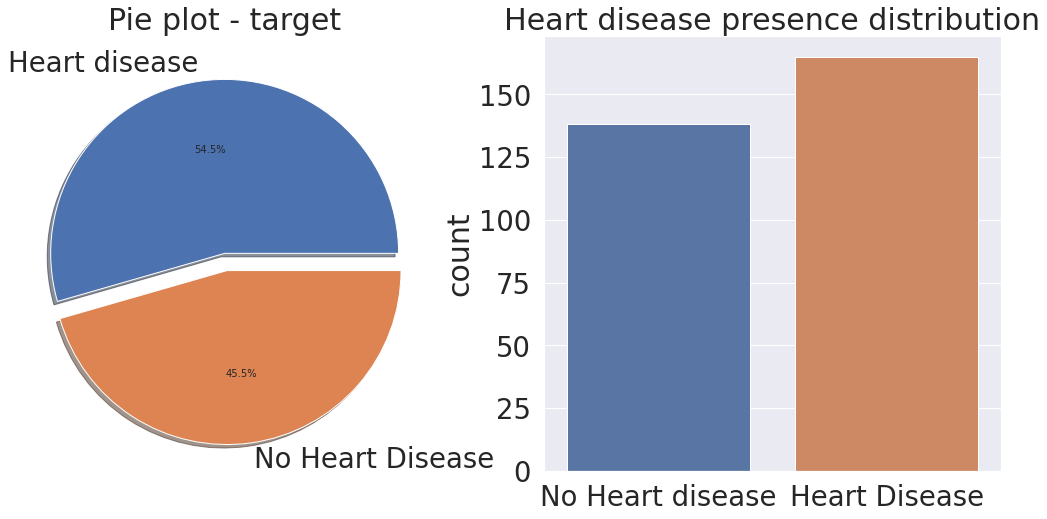

In [8]:
f, ax=plt.subplots(1,2,figsize=(18,8))

df_heart['target'].value_counts().plot.pie(explode=[0,0.1],labels=["Heart disease",'No Heart Disease'],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - target')
ax[0].set_ylabel('')
f=sns.countplot(x='target',data=df_heart)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(["No Heart disease",'Heart Disease'])
plt.xlabel("")
plt.show

##**문제1: cp(가슴 통증 유형)과 target(심잠병 유무) 사이의 관계를 자유롭게 분석하시오.**

In [9]:
#Group 수
df_heart[['cp','target']].groupby(['cp']).count()

,target
cp,
0,143
1,50
2,87
3,23


In [10]:
#cp 와 target cp 0 의 경우는 39명이 심장병 진단
pd.crosstab(df_heart['cp'],df_heart['target'],margins=True).style.background_gradient(cmap='summer')

target,0,1,All
cp,,,
0,104,39,143
1,9,41,50
2,18,69,87
3,7,16,23
All,138,165,303


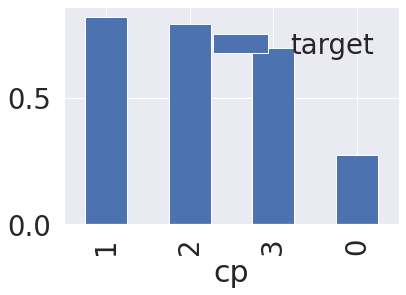

In [11]:
# cp는 1번 2번 3번 0번 순서로 집단내 심장병 진단 환자 비율이 높음을 알 수 있음
df_heart[['cp','target']].groupby(['cp']).mean().sort_values(by='target',ascending=False).plot.bar()

<function matplotlib.pyplot.show>

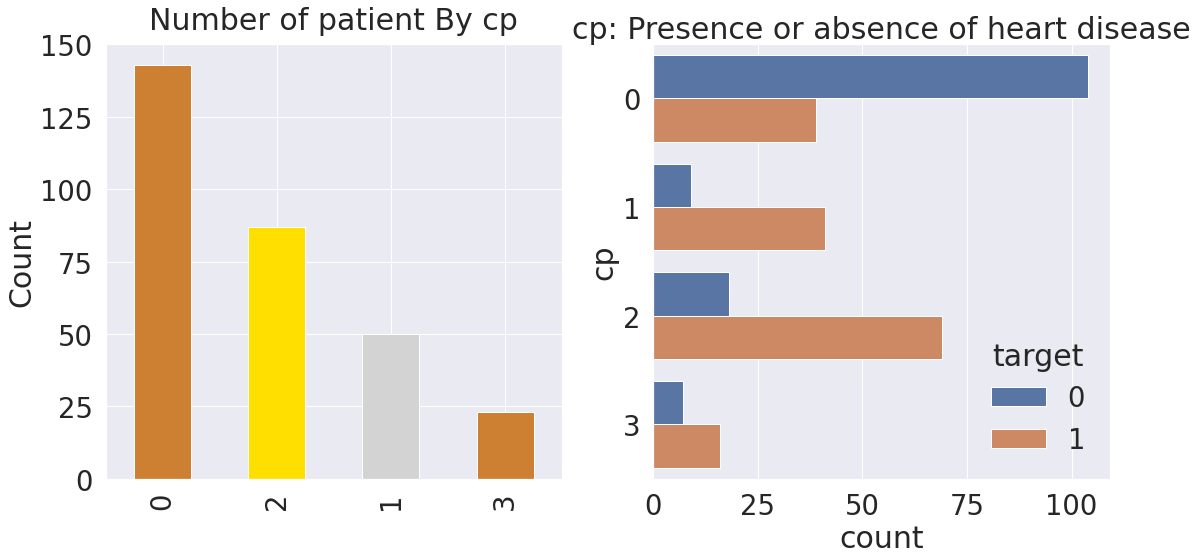

In [12]:
#하지만 환자수로 보았을 때는 2번 1번 0번 3번 순서로 환자수가 많음
y_position=1.02
f,ax=plt.subplots(1,2,figsize=(18,8))
df_heart['cp'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0]) 
ax[0].set_title('Number of patient By cp', y=y_position) 
ax[0].set_ylabel('Count') 
sns.countplot(y='cp',hue='target',data=df_heart)
ax[1].set_title('cp: Presence or absence of heart disease')
plt.show

**문제1의 결론**
1.   cp는 1번 2번 3번 0번 순서로 집단내 심장병 진단 환자 비율이 높음을 알 수 있음
2.   하지만 환자수로 보았을 때는 2번 1번 0번 3번 순서로 환자수가 많음

0 – 전형적인 협심증
1 – 비전형적인 협심증
2 – 비협심증 통증
3- 증상 없음

##**문제2: sex(성별)과 target(심잠병 유무) 사이의 관계를 자유롭게 분석하시오.**

<function matplotlib.pyplot.show>

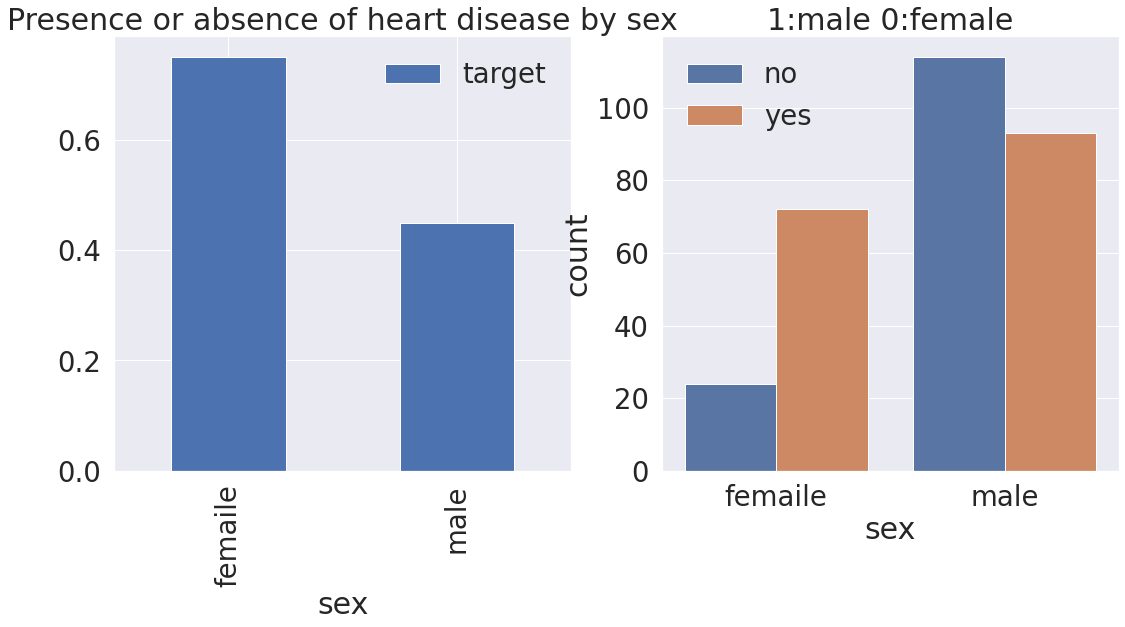

In [13]:
#여자가 비율적으로 심장병환자가 더 많다. 하지만 수적으로는 남자 심장병 환자가 더 많다.
f,ax=plt.subplots(1,2,figsize=(18,8))
df_heart[['sex','target']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Presence or absence of heart disease by sex')
sns.countplot('sex',hue='target',data=df_heart,ax=ax[1])
plt.legend(['no','yes'])
ax[1].set_title("1:male 0:female")
ax[0].set_xticklabels(['femaile','male'])
ax[1].set_xticklabels(['femaile','male'])
plt.show

In [14]:
#남자 44퍼 여자는 75퍼
df_heart[['sex','target']].groupby(['sex'], as_index=False).mean()

,sex,target
0,0,0.750000
1,1,0.449275


**문제2의 결론**


1.   여자가 비율적으로 심장병환자가 더 많다. 하지만 수적으로는 남자 심장병 환자가 더 많다
2.   남자 44퍼 여자는 75퍼



##**문제3: exang(협심즘 유발 운동)과 target(심잠병 유무) 사이의 관계를 자유롭게 분석하시오.**

<function matplotlib.pyplot.show>

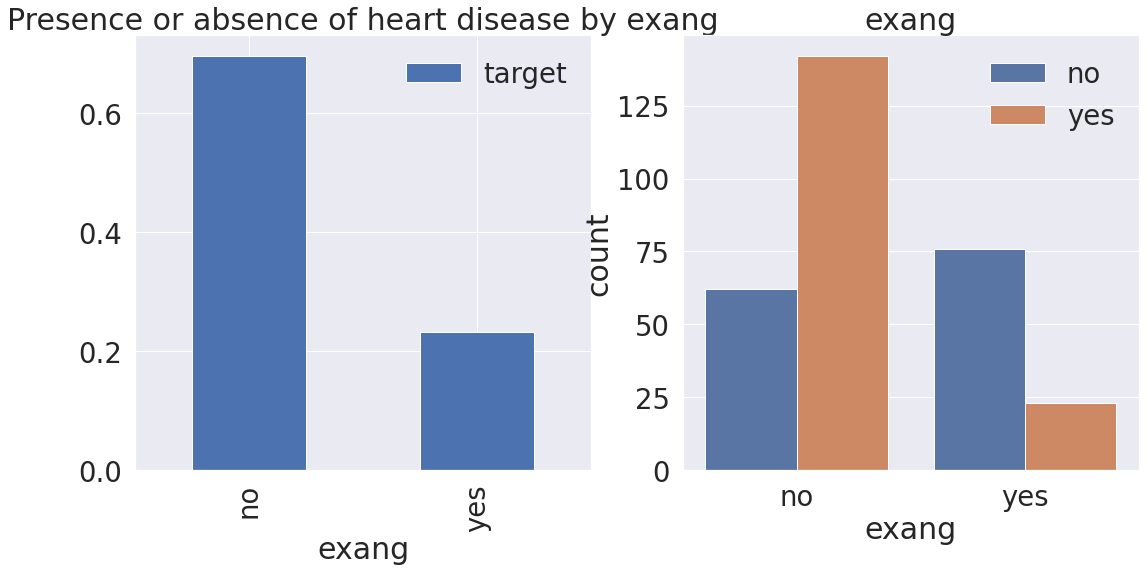

In [15]:
#협심증 유발운동이 없는 사람이 심장병 유무 비율이 높고 실제로도 수적으로도 많다.
f,ax=plt.subplots(1,2,figsize=(18,8))
df_heart[['exang','target']].groupby(['exang']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Presence or absence of heart disease by exang')
sns.countplot('exang',hue='target',data=df_heart,ax=ax[1])
plt.legend(['no','yes'])
ax[1].set_title("exang")
ax[0].set_xticklabels(['no','yes'])
ax[1].set_xticklabels(['no','yes'])
plt.show

In [16]:
df_heart[['exang','target']].groupby(['exang'], as_index=False).mean()

,exang,target
0,0,0.696078
1,1,0.232323


**문제3의 결론**


1.   #협심증 유발운동이 없는 사람이 심장병 유무 비율이 높고 실제로도 수적으로도 많다.
2.   no 69퍼 yes 23퍼



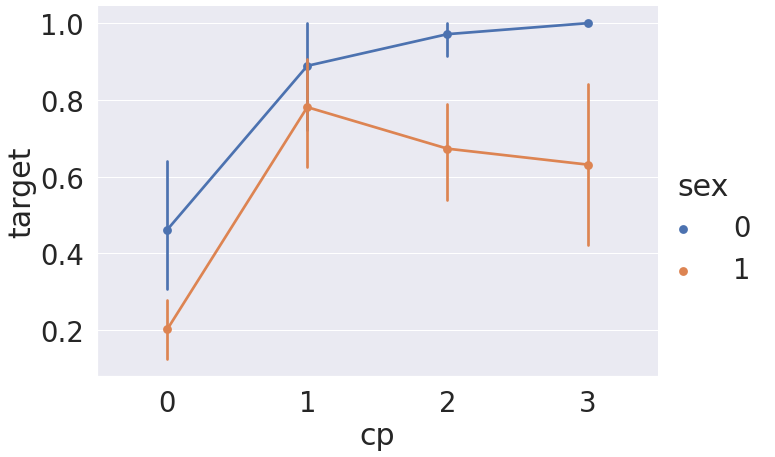

In [17]:
sns.factorplot('cp','target',hue='sex',data=df_heart,size=6,aspect=1.5)

##**별도 Sex와 target,cp 간 관계와 히트맵 등**




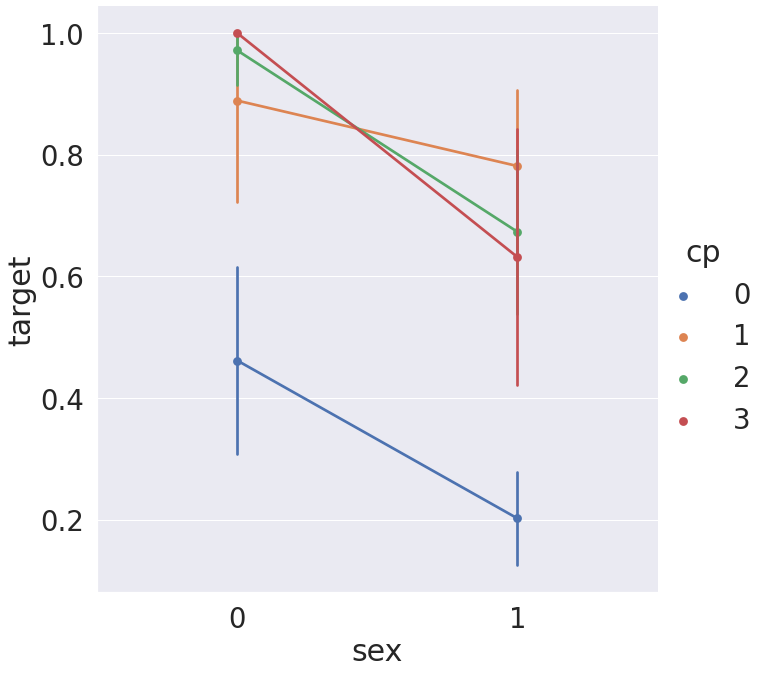

In [18]:
sns.factorplot('sex','target',hue='cp',data=df_heart,saturation=5,size=9,aspect=1)

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'cp'),
 Text(3.5, 0, 'trestbps'),
 Text(4.5, 0, 'chol'),
 Text(5.5, 0, 'fbs'),
 Text(6.5, 0, 'restecg'),
 Text(7.5, 0, 'thalach'),
 Text(8.5, 0, 'exang'),
 Text(9.5, 0, 'oldpeak'),
 Text(10.5, 0, 'slope'),
 Text(11.5, 0, 'ca'),
 Text(12.5, 0, 'thal'),
 Text(13.5, 0, 'target')]

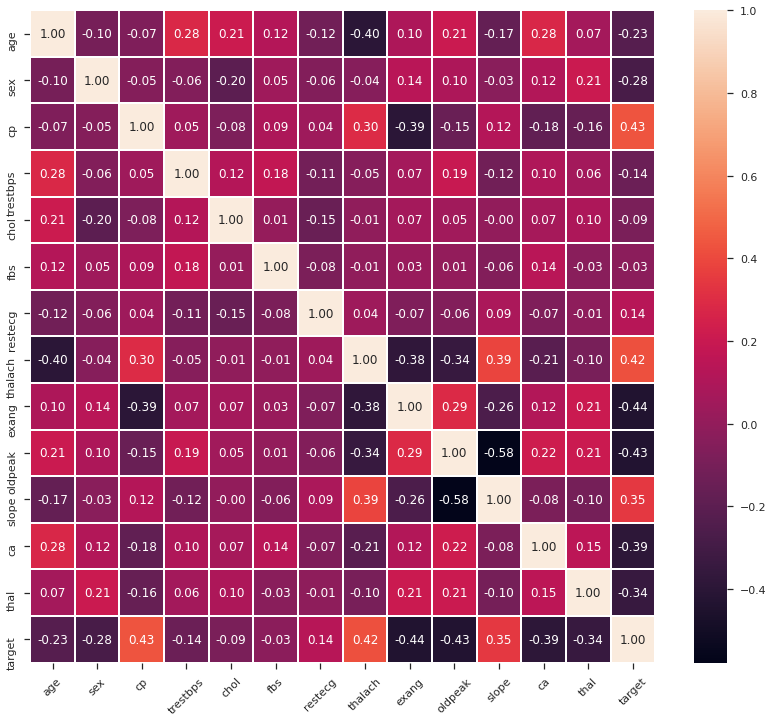

In [19]:
sns.set(style='ticks',color_codes=True)
plt.figure(figsize=(14,12))
heat_map=sns.heatmap(df_heart.corr(method='pearson'),annot=True,fmt='.2f',linewidths=1)
heat_map.set_xticklabels(heat_map.get_xticklabels(),rotation=45)

[Text(0, 0.5, 'total'), Text(0.5, 0, 'age')]

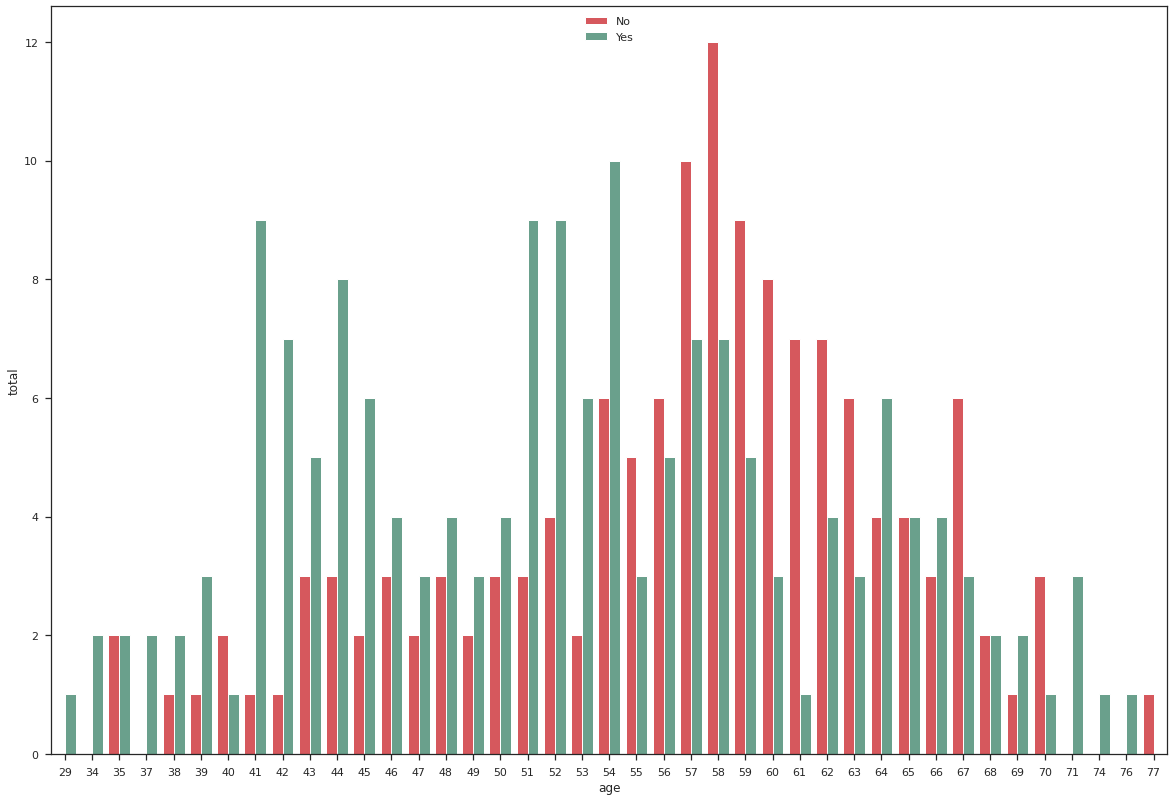

In [20]:
df_heart['age']=df_heart['age'].apply(lambda h: round(h))

fig=plt.figure(figsize=(20, 5.5/8*20))
ax = sns.countplot(x='age', 
                   hue='target', 
                   palette={0:'#EB434A', 1:'#61A98F'}, 
                   data=df_heart)
plt.legend(['No','Yes'])
ax.set(xlabel='age', ylabel='total')


##**모델만들기**

In [64]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [65]:
for col in df.columns:
   msg='column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col,100 * (df[col].isnull().sum()/ df[col].shape[0]))
   print(msg)

column:        age	 Percent of Nan value: 0.00%
column:        sex	 Percent of Nan value: 0.00%
column:         cp	 Percent of Nan value: 0.00%
column:   trestbps	 Percent of Nan value: 0.00%
column:       chol	 Percent of Nan value: 0.00%
column:        fbs	 Percent of Nan value: 0.00%
column:    restecg	 Percent of Nan value: 0.00%
column:    thalach	 Percent of Nan value: 0.00%
column:      exang	 Percent of Nan value: 0.00%
column:    oldpeak	 Percent of Nan value: 0.00%
column:      slope	 Percent of Nan value: 0.00%
column:         ca	 Percent of Nan value: 0.00%
column:       thal	 Percent of Nan value: 0.00%
column:     target	 Percent of Nan value: 0.00%


In [149]:
X_data=df.drop(["target","exang"],axis=1) #axis=0이면 가로x 1이면 세로y  target과 exang 관계
X= (X_data-np.min(X_data))/(np.max(X_data)-np.min(X_data)).values #normalization 일반화하기
print(X)

          age  sex        cp  trestbps  ...   oldpeak  slope    ca      thal
0    0.708333  1.0  1.000000  0.481132  ...  0.370968    0.0  0.00  0.333333
1    0.166667  1.0  0.666667  0.339623  ...  0.564516    0.0  0.00  0.666667
2    0.250000  0.0  0.333333  0.339623  ...  0.225806    1.0  0.00  0.666667
3    0.562500  1.0  0.333333  0.245283  ...  0.129032    1.0  0.00  0.666667
4    0.583333  0.0  0.000000  0.245283  ...  0.096774    1.0  0.00  0.666667
..        ...  ...       ...       ...  ...       ...    ...   ...       ...
298  0.583333  0.0  0.000000  0.433962  ...  0.032258    0.5  0.00  1.000000
299  0.333333  1.0  1.000000  0.150943  ...  0.193548    0.5  0.00  1.000000
300  0.812500  1.0  0.000000  0.471698  ...  0.548387    0.5  0.50  1.000000
301  0.583333  1.0  0.000000  0.339623  ...  0.193548    0.5  0.25  1.000000
302  0.583333  0.0  0.333333  0.339623  ...  0.000000    0.5  0.25  0.666667

[303 rows x 12 columns]


In [150]:
Y=df.target.values #target만들기 303개 
print(Y.shape)

(303,)


**1.split**

In [151]:
from sklearn.model_selection import train_test_split

X_t, X_test, Y_t, Y_test =train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
X_train, X_validation, Y_train, Y_validation =train_test_split(X_t, Y_t, stratify=Y_t, test_size=0.2, random_state=42)

X_train = X_train.T
X_validation=X_validation.T
X_test=X_test.T
X_train.shape
m=X_train.shape[1]
n=X_train.shape[0]
print(X_validation)

               180       55        155  ...       110       200       274
age       0.541667  0.479167  0.604167  ...  0.729167  0.312500  0.375000
sex       1.000000  1.000000  0.000000  ...  0.000000  1.000000  1.000000
cp        0.000000  0.333333  0.000000  ...  0.000000  0.000000  0.000000
trestbps  0.358491  0.377358  0.339623  ...  0.811321  0.150943  0.150943
chol      0.518265  0.171233  0.162100  ...  0.454338  0.162100  0.340183
fbs       0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
restecg   0.500000  0.500000  0.500000  ...  0.500000  0.000000  0.000000
thalach   0.465649  0.664122  0.458015  ...  0.633588  0.809160  0.358779
oldpeak   0.193548  0.129032  0.096774  ...  0.000000  0.000000  0.161290
slope     0.500000  1.000000  0.500000  ...  1.000000  1.000000  0.500000
ca        0.250000  0.250000  0.000000  ...  0.000000  0.250000  0.250000
thal      1.000000  0.666667  0.666667  ...  0.666667  0.666667  0.666667

[12 rows x 49 columns]


**Initialization**


In [152]:
def initialization(feature): 
  w=np.full((feature,1),0.01) #w=[[0.01]~~]
  b=0.0
  return w,b

**sigmoid**

In [153]:
def sigmoid(z):
  A=1/(1+np.exp(-z))
  return A

**forward & backward propagation**

In [154]:
def propagation(w,b,X_train,Y_train): 
  #forward
  Z = np.dot(w.T,X_train)+b #Z=wx+b
  A= sigmoid(Z)
  loss= -(Y_train*np.log(A) + (1-Y_train)*np.log(1-A))
  cost=(np.sum(loss))/m #평균 cost 만들기 
  
  #backward
  #dw= X * dz 
  #dz= a - y
  #da = (y/a) + (1-y)/(1-a)
  dw=(1/m)*np.dot(X_train,(A-Y_train).T) #dw = x * dz
  db=(1/m)*np.sum(A-Y_train)

  grads={"dw":dw,
        "db":db}

  return cost, grads

**Update**

In [155]:
def update(w, b, X_train, Y_train, lr, iterations):
  cost_list = []
  cost_list2 = []
  index = [] 

  for i in range(iterations):
    cost, grads = propagation(w, b, X_train, Y_train)
    cost_list.append(cost)

    w = w - lr*grads["dw"]
    b = b - lr*grads["db"]

    if i % 5 == 0: #5번 돌 때 마다 갱신
      cost_list2.append(cost)
      index.append(i)

  parameters = {"w":w, "b":b}
  plt.plot(index, cost_list2)
  plt.xlabel("iter")
  plt.ylabel("cost")
  plt.show()

  return parameters, cost_list


**Prediction**


In [156]:
def predict_validation(w, b, X_validation):
  Z = sigmoid(np.dot(w.T, X_validation) + b)
  Y_prediction = np.zeros((1, X_validation.shape[1]))

  for i in range(Z.shape[1]):
    if Z[0, i] <= 0.5:
      Y_prediction[0, i] = 0
    else:
      Y_prediction[0, i] = 1

  return Y_prediction

In [157]:
def predict_test(w, b, test):
  Z = sigmoid(np.dot(w.T, test) + b)
  Y_prediction = np.zeros((1, test.shape[1]))

  for i in range(Z.shape[1]):
    if Z[0, i] <= 0.5:
      Y_prediction[0, i] = 0
    else:
      Y_prediction[0, i] = 1

  return Y_prediction

**logistic regression**

In [158]:
X_train.shape 

(12, 193)

In [159]:
X_t.T.shape

(12, 242)

In [160]:
def logistic_regression(X_train, Y_train, X_validation, Y_validation, lr, iterations):
  feature = X_train.shape[0]
  w, b = initialization(feature)

  parameters, cost_list = update(w, b, X_train, Y_train, lr, iterations)

  Y_prediction_validation = predict_validation(parameters["w"], parameters["b"], X_validation)

  print("Validation accuracy: {}%".format( 100 - np.mean(np.abs(Y_prediction_validation - Y_validation))*100))
  print(parameters["w"])
  print(parameters["b"])

  return parameters

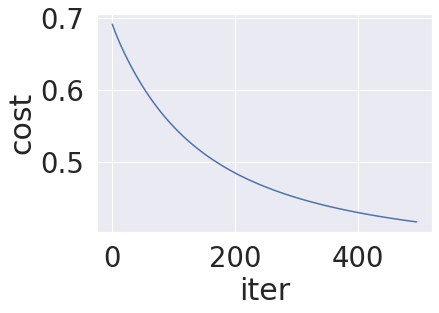

Validation accuracy: 85.71428571428572%
[[-0.50987777]
 [-0.88338558]
 [ 2.05268267]
 [-0.35296983]
 [-0.2609324 ]
 [ 0.0188446 ]
 [ 0.3507463 ]
 [ 1.05113382]
 [-1.01759133]
 [ 1.30886731]
 [-1.03657648]
 [-0.92572516]]
0.033066516043214284


In [161]:
predicted_parameters = logistic_regression(X_train, Y_train, X_validation, Y_validation, lr=0.1, iterations=500)


In [162]:
X_test.T

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal
179,0.583333,1.0,0.000000,0.528302,0.342466,0.0,0.0,0.312977,0.096774,0.5,0.25,0.333333
197,0.791667,1.0,0.000000,0.292453,0.292237,1.0,0.5,0.702290,0.032258,0.5,0.50,1.000000
285,0.354167,1.0,0.000000,0.433962,0.422374,0.0,0.5,0.374046,0.290323,0.5,0.50,1.000000
194,0.645833,1.0,0.666667,0.433962,0.134703,0.0,0.0,0.641221,0.483871,0.5,0.00,0.666667
188,0.437500,1.0,0.666667,0.433962,0.244292,0.0,0.5,0.702290,0.096774,0.5,0.25,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
14,0.604167,0.0,1.000000,0.528302,0.358447,1.0,0.0,0.694656,0.161290,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,0.096774,1.0,0.00,0.666667
224,0.520833,1.0,0.000000,0.150943,0.257991,0.0,0.5,0.419847,0.451613,0.5,0.25,1.000000
202,0.604167,1.0,0.000000,0.528302,0.328767,0.0,0.0,0.305344,0.129032,1.0,0.00,1.000000


In [164]:
patient_index=188
predicted_target = predict_test(predicted_parameters["w"], predicted_parameters["b"], (X_test.T.loc[[patient_index]]).T)
real_target = (df.loc[patient_index]['target'])
print("predicted:", int(predicted_target), "\nreal:",int(real_target))

if predicted_target == real_target:
  print("Model is correct")
else:
  print("Model is wrong")


predicted: 1 
real: 0
Model is wrong
